In [253]:
from bs4 import BeautifulSoup,Comment
import urllib.request
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

In [81]:
#to get soup for 2020 team offense using Comment, used below
url = "https://www.pro-football-reference.com/years/2020/"
soup = BeautifulSoup(requests.get(url).content, 'html.parser')
table = soup.select_one('#all_team_stats').find_next(text=lambda t: isinstance(t, Comment))
table = BeautifulSoup(table, 'html.parser')



In [246]:
#what the HTML looks like
table.prettify()[0:2500]

'<div class="table_container" id="div_team_stats">\n <table class="per_match_toggle sortable stats_table" data-cols-to-freeze=",2" id="team_stats">\n  <caption>\n   Team Offense Table\n  </caption>\n  <colgroup>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n  </colgroup>\n  <thead>\n   <tr class="over_header">\n    <th aria-label="" class="over_header center" colspan="2" data-stat="">\n    </th>\n    <th>\n    </th>\n    <th>\n    </th>\n    <th>\n    </th>\n    <th aria-label="" class="over_header center" colspan="3" data-stat="header_tot_off_tgl">\n     Tot Yds &amp; TO\n    </th>\n    <th>\n    </th>\n    <th>\n    </th>\n    <th aria-label="" class="over_header center" colspan="7" data-stat="header_pass">\n     Passing\n   

In [124]:
#function to rename some columns and columns that are missing titles from HTML table
def rename_cols(df):
    dict = {'Unnamed: 0_level_0':'TotOff',
            'Unnamed: 1_level_0':'TotOff',
            'Unnamed: 2_level_0':'TotOff',
            'Unnamed: 3_level_0':'TotOff',
            'Unnamed: 4_level_0':'TotOff',
            'Tot Yds & TO':'TotOff',
            'Tot Yds & TO':'TotOff',
            'Tot Yds & TO':'TotOff',
            'Unnamed: 8_level_0':'TotOff',
            'Unnamed: 9_level_0':'TotOff',
            'Unnamed: 25_level_0':'Score%',
            'Unnamed: 26_level_0':'TurnOver%',
            'Unnamed: 27_level_0':'EXP',}
        
    # call rename() method
    df.rename(columns=dict,inplace=True)
    return(df)


In [391]:
#for loop to get data for X years


year = 2020
#URL for website data
url = "https://www.pro-football-reference.com/years/"
urls = []
OFFdfs = []
for index in np.arange(10):
    #create URL for BeautifulSoup
    urls.append(url + str(year - index) +'/')
    years = year - index


for index in urls:
    soup = BeautifulSoup(requests.get(index).content, 'html.parser')
    table = soup.select_one('#all_team_stats').find_next(text=lambda t: isinstance(t, Comment))
    table = BeautifulSoup(table, 'html.parser')    
    #create DF from html table, drop last 3 rows of data 
    OFFdfs.append(pd.read_html(str(table))[0].drop(df.index[-3:]))

for index in np.arange(10):
    #add Year to DF columns
    curr_year = year - index
    OFFdfs[index]['Year'] = curr_year

#initialize Master Team Offense Dataframe    
MasterOFF = OFFdfs[0]

for i in range(len(OFFdfs)-1):    
    #append DF to master, reset index to continuous
    MasterOFF = MasterOFF.append(OFFdfs[i+1],ignore_index = True)

#rename columns to useful index    
MasterOFF = rename_cols(MasterOFF)



[   Unnamed: 0_level_0        Unnamed: 1_level_0 Unnamed: 2_level_0  \
                   Rk                        Tm                  G   
0                 1.0         Green Bay Packers               16.0   
1                 2.0             Buffalo Bills               16.0   
2                 3.0      Tampa Bay Buccaneers               16.0   
3                 4.0          Tennessee Titans               16.0   
4                 5.0        New Orleans Saints               16.0   
5                 6.0        Kansas City Chiefs               16.0   
6                 7.0          Baltimore Ravens               16.0   
7                 8.0          Seattle Seahawks               16.0   
8                 9.0        Indianapolis Colts               16.0   
9                10.0         Las Vegas Raiders               16.0   
10               11.0         Minnesota Vikings               16.0   
11               12.0       Pittsburgh Steelers               16.0   
12               13

In [237]:
MasterOFF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (TotOff, Rk)        320 non-null    float64
 1   (TotOff, Tm)        320 non-null    object 
 2   (TotOff, G)         320 non-null    float64
 3   (TotOff, PF)        320 non-null    float64
 4   (TotOff, Yds)       320 non-null    float64
 5   (TotOff, Ply)       320 non-null    float64
 6   (TotOff, Y/P)       320 non-null    float64
 7   (TotOff, TO)        320 non-null    float64
 8   (TotOff, FL)        320 non-null    float64
 9   (TotOff, 1stD)      320 non-null    float64
 10  (Passing, Cmp)      320 non-null    float64
 11  (Passing, Att)      320 non-null    float64
 12  (Passing, Yds)      320 non-null    float64
 13  (Passing, TD)       320 non-null    float64
 14  (Passing, Int)      320 non-null    float64
 15  (Passing, NY/A)     320 non-null    float64
 16  (Passing

In [268]:
MasterOFF.keys()

MultiIndex([(   'TotOff',    'Rk'),
            (   'TotOff',    'Tm'),
            (   'TotOff',     'G'),
            (   'TotOff',    'PF'),
            (   'TotOff',   'Yds'),
            (   'TotOff',   'Ply'),
            (   'TotOff',   'Y/P'),
            (   'TotOff',    'TO'),
            (   'TotOff',    'FL'),
            (   'TotOff',  '1stD'),
            (  'Passing',   'Cmp'),
            (  'Passing',   'Att'),
            (  'Passing',   'Yds'),
            (  'Passing',    'TD'),
            (  'Passing',   'Int'),
            (  'Passing',  'NY/A'),
            (  'Passing',  '1stD'),
            (  'Rushing',   'Att'),
            (  'Rushing',   'Yds'),
            (  'Rushing',    'TD'),
            (  'Rushing',   'Y/A'),
            (  'Rushing',  '1stD'),
            ('Penalties',   'Pen'),
            ('Penalties',   'Yds'),
            ('Penalties', '1stPy'),
            (   'Score%',   'Sc%'),
            ('TurnOver%',   'TO%'),
            (      'EXP',   

<Figure size 720x720 with 0 Axes>

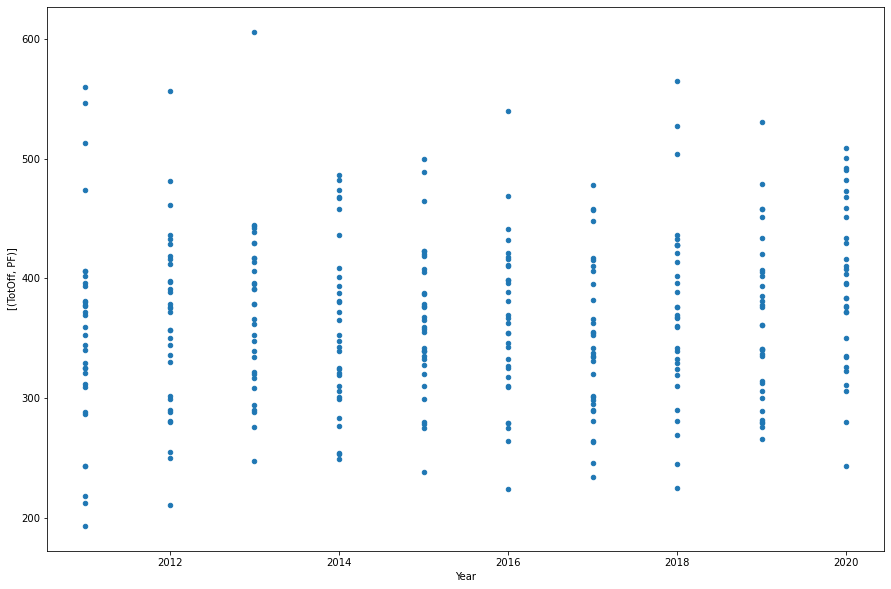

In [277]:
plt.figure(figsize=(10, 10))
#pointsfor = MasterOFF.TotOff.PF
MasterOFF.plot.scatter("Year", [('TotOff','PF')] , figsize=(15, 10))
plt.show()

In [295]:
url = "https://www.pro-football-reference.com/years/2020/opp.htm"
soup = BeautifulSoup(requests.get(url).content, 'html.parser')
#table = soup.select_one('team_stats').find_next(text=lambda t: isinstance(t, Comment))
#table = BeautifulSoup(table, 'html.parser')

In [303]:
table = soup.find('table', id = 'team_stats')
table.prettify()[0:500]

'<table class="per_match_toggle sortable stats_table" data-cols-to-freeze=",2" id="team_stats">\n <caption>\n  Team Defense Table\n </caption>\n <colgroup>\n  <col/>\n  <col/>\n  <col/>\n  <col/>\n  <col/>\n  <col/>\n  <col/>\n  <col/>\n  <col/>\n  <col/>\n  <col/>\n  <col/>\n  <col/>\n  <col/>\n  <col/>\n  <col/>\n  <col/>\n  <col/>\n  <col/>\n  <col/>\n  <col/>\n  <col/>\n  <col/>\n  <col/>\n  <col/>\n  <col/>\n  <col/>\n  <col/>\n </colgroup>\n <thead>\n  <tr class="over_header">\n   <th aria-label="" class="over_header center" '

In [308]:
table2 = soup.find('table', id = 'advanced_defense')

In [304]:
DEFdf = pd.read_html(str(table))[0]

In [343]:
rename_cols(DEFdf)
DEFdf.head(5)

TotOff                                                                    \
      Rk                        Tm     G     PF     Yds     Ply  Y/P    TO   
0    1.0          Los Angeles Rams  16.0  296.0  4511.0   989.0  4.6  22.0   
1    2.0          Baltimore Ravens  16.0  303.0  5276.0  1017.0  5.2  22.0   
2    3.0       Pittsburgh Steelers  16.0  312.0  4893.0   996.0  4.9  27.0   
3    4.0  Washington Football Team  16.0  329.0  4873.0  1004.0  4.9  23.0   
4    5.0        New Orleans Saints  16.0  337.0  4974.0   992.0  5.0  26.0   

                ... Rushing                   Penalties              Score%  \
     FL   1stD  ...     Yds    TD  Y/A   1stD       Pen    Yds 1stPy    Sc%   
0   8.0  280.0  ...  1460.0  12.0  3.8   91.0      78.0  582.0  19.0   27.9   
1  12.0  347.0  ...  1740.0  12.0  4.6   96.0      77.0  646.0  38.0   30.0   
2   9.0  281.0  ...  1783.0  13.0  4.3   94.0     103.0  980.0  24.0   29.3   
3   7.0  289.0  ...  1805.0  14.0  4.2  100.0      85.0  708.0  28.0   31.4   
4   8.0  320.0  ...  1502.0  11.0  3.9   85.0      64.0  517.0  50.0   34.7   

  TurnOver%    EXP  
        TO%    EXP  
0      12.0  85.89  
1      12.4 -17.69  
2      13.8  33.24  
3      12.2  32.51  
4      13.1 -40.02  

[5 rows x 28 columns]

In [313]:
ADV_DEFdf = pd.read_html(str(table2))[0]
ADV_DEFdf.head(5)


,Tm,G,Att,Cmp,Yds,TD,DADOT,Air,YAC,Bltz,Bltz%,Hrry,Hrry%,QBKD,QBKD%,Sk,Prss,Prss%,MTkl
0,Atlanta Falcons,16,625,425,4697,34,8.5,2766,2224,225,32.9%,71,10.4%,61,9.8%,29,161,23.6%,101
1,Buffalo Bills,16,573,369,3726,23,6.9,2176,1774,230,35.8%,50,7.8%,55,9.6%,38,143,22.2%,125
2,Carolina Panthers,16,585,398,3825,28,7.5,2369,1965,153,24.0%,55,8.6%,59,10.1%,29,143,22.4%,121
3,Chicago Bears,16,547,350,3705,28,8.6,2377,1748,131,21.4%,49,8.0%,53,9.7%,35,137,22.4%,89
4,Cincinnati Bengals,16,541,340,3859,32,8.9,2408,1655,182,31.1%,39,6.7%,55,10.2%,17,111,19.0%,110


In [366]:
sacks = ['Tm','Sk']
Team_Sacks = ADV_DEFdf[sacks]
print(type(Team_Sacks))
#Team_Sacks.head(5)

<class 'pandas.core.frame.DataFrame'>


In [347]:
#DEF_df = DEFdf.join(Team_Sacks.set_index('Tm'))
DEF_df = pd.concat([DEFdf.set_index([('TotOff', 'Tm')]),Team_Sacks.set_index('Tm')], axis = 1)

#rename_cols(DEF_df)
DEF_df.head()

,"(TotOff, Rk)","(TotOff, G)","(TotOff, PF)","(TotOff, Yds)","(TotOff, Ply)","(TotOff, Y/P)","(TotOff, TO)","(TotOff, FL)","(TotOff, 1stD)","(Passing, Cmp)",...,"(Rushing, TD)","(Rushing, Y/A)","(Rushing, 1stD)","(Penalties, Pen)","(Penalties, Yds)","(Penalties, 1stPy)","(Score%, Sc%)","(TurnOver%, TO%)","(EXP, EXP)",Sk
Los Angeles Rams,1.0,16.0,296.0,4511.0,989.0,4.6,22.0,8.0,280.0,347.0,...,12.0,3.8,91.0,78.0,582.0,19.0,27.9,12.0,85.89,53.0
Baltimore Ravens,2.0,16.0,303.0,5276.0,1017.0,5.2,22.0,12.0,347.0,380.0,...,12.0,4.6,96.0,77.0,646.0,38.0,30.0,12.4,-17.69,39.0
Pittsburgh Steelers,3.0,16.0,312.0,4893.0,996.0,4.9,27.0,9.0,281.0,298.0,...,13.0,4.3,94.0,103.0,980.0,24.0,29.3,13.8,33.24,56.0
Washington Football Team,4.0,16.0,329.0,4873.0,1004.0,4.9,23.0,7.0,289.0,330.0,...,14.0,4.2,100.0,85.0,708.0,28.0,31.4,12.2,32.51,47.0
New Orleans Saints,5.0,16.0,337.0,4974.0,992.0,5.0,26.0,8.0,320.0,333.0,...,11.0,3.9,85.0,64.0,517.0,50.0,34.7,13.1,-40.02,45.0


In [405]:
#for loop to get data for X years

year = 2020
#URL for website data
url = "https://www.pro-football-reference.com/years/"
urls = []
DEFdfs = []
ADV_DEFdf = []
Team_Sacks = [] #pd.DataFrame(['Tm','Sk'])
for index in np.arange(3):
    #create URL for BeautifulSoup
    urls.append(url + str(year - index) +'/opp.htm')
    years = year - index
sacks = ['Tm','Sk']

for index in urls:
    soup = BeautifulSoup(requests.get(index).content, 'html.parser')
    table = soup.find('table', id = 'team_stats') 
    table2 = soup.find('table', id = 'advanced_defense')
    #create DF from html table, drop last 3 rows of data 
    DEFdfs.append(pd.read_html(str(table))[0].drop(df.index[-3:]))
    #rename_cols(DEFdfs)
    ADV_DEFdf.append(pd.read_html(str(table2))[0])
    #tm_sk_df = (ADV_DEFdf[sacks])
    #Team_Sacks.append(tm_sk_df)
#print(Team_Sacks)    
print(type(DEFdfs))
#print(ADV_DEFdf)
#print(type(Team_Sacks))    



for index in np.arange(3):
    #add Year to DF columns
    curr_year = year - index
    DEFdfs[index]['Year'] = curr_year

#initialize Master Team Offense Dataframe 

DEF_df = DEFdfs[0]
ADV_DEF_df = ADV_DEFdf[0]
#ADV_DEFdf = pd.DataFrame()
#Team_Sacks = pd.DataFrame(Team_Sacks[:],columns = ['Tm','Sk'])


#print(Team_Sacks.head(45))

for i in range(len(DEFdfs)-1):    
    #append DF to master, reset index to continuous
    DEF_df = DEF_df.append(DEFdfs[i+1],ignore_index = True)
for i in range(len(ADV_DEFdf)-1):
    ADV_DEF_df = ADV_DEF_df.append(ADV_DEFdf[i+1],ignore_index = True)
print(DEF_df.info())
print(ADV_DEF_df.info()) 
Team_Sacks = ADV_DEF_df[sacks]
print(Team_Sacks.head())
#rename columns to useful index    
DEF_df = rename_cols(DEF_df)

MasterDEF = pd.concat([DEF_df.set_index([('TotOff', 'Tm')]),Team_Sacks.set_index('Tm')], axis = 1)
#MasterDEF = pd.concat([DEF_df,Team_Sacks], axis = 1)


<class 'list'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (Unnamed: 0_level_0, Rk)    96 non-null     float64
 1   (Unnamed: 1_level_0, Tm)    96 non-null     object 
 2   (Unnamed: 2_level_0, G)     96 non-null     float64
 3   (Unnamed: 3_level_0, PF)    96 non-null     float64
 4   (Unnamed: 4_level_0, Yds)   96 non-null     float64
 5   (Tot Yds & TO, Ply)         96 non-null     float64
 6   (Tot Yds & TO, Y/P)         96 non-null     float64
 7   (Tot Yds & TO, TO)          96 non-null     float64
 8   (Unnamed: 8_level_0, FL)    96 non-null     float64
 9   (Unnamed: 9_level_0, 1stD)  96 non-null     float64
 10  (Passing, Cmp)              96 non-null     float64
 11  (Passing, Att)              96 non-null     float64
 12  (Passing, Yds)              96 non-null     float64
 13  (Passing, TD)         

In [475]:
year = 2020
#URL for website data
url = "https://www.pro-football-reference.com/years/"
urls = []
DEFdfs = []
ADV_DEFdf = []
Team_Sacks = pd.DataFrame(['Tm','Sk'])
for index in np.arange(3):
    #create URL for BeautifulSoup
    urls.append(url + str(year - index) +'/opp.htm')
    years = year - index
sacks = ['Tm','Sk']

for index in urls:
    soup = BeautifulSoup(requests.get(index).content, 'html.parser')
    table = soup.find('table', id = 'team_stats') 
    table2 = soup.find('table', id = 'advanced_defense')
    #create DF from html table, drop last 3 rows of data 
    DEFdf = pd.read_html(str(table))[0].drop(df.index[-3:])
    #rename_cols(DEFdfs)
    ADV_DEFdf = pd.read_html(str(table2))[0]
    tm_sk_df = ADV_DEFdf[sacks]
    Team_Sacks = (tm_sk_df)
    DEFdf_interm = pd.concat([DEFdf.set_index([('Unnamed: 1_level_0', 'Tm')]),Team_Sacks.set_index('Tm')], axis = 1)
    idx = np.arange(len(DEFdf_interm))
    DEFdf_interm['new_col'] = np.arange(len(DEFdf_interm))
    DEFdf_interm.reset_index(drop=True)
    DEFdf_interm.set_index('new_col')
    DEFdfs.append(DEFdf_interm)

#print(Team_Sacks)    
print(type(DEFdf))
#print(ADV_DEFdf)
print(type(Team_Sacks))
print(type(DEFdfs))
Team_Sacks
DEFdfs

MasterDEF = DEFdfs[0]
#ADV_DEFdf = pd.DataFrame()
#Team_Sacks = pd.DataFrame(Team_Sacks[:],columns = ['Tm','Sk'])
print(MasterDEF.head())
print(type(MasterDEF))
#print(Team_Sacks.head(45))

for i in range(len(DEFdfs)-1):    
    #append DF to master, reset index to continuous
    MasterDEF = MasterDEF.append(DEFdfs[i+1])


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'list'>
                          (Unnamed: 0_level_0, Rk)  (Unnamed: 2_level_0, G)  \
Los Angeles Rams                               1.0                     16.0   
Baltimore Ravens                               2.0                     16.0   
Pittsburgh Steelers                            3.0                     16.0   
Washington Football Team                       4.0                     16.0   
New Orleans Saints                             5.0                     16.0   

                          (Unnamed: 3_level_0, PF)  (Unnamed: 4_level_0, Yds)  \
Los Angeles Rams                             296.0                     4511.0   
Baltimore Ravens                             303.0                     5276.0   
Pittsburgh Steelers                          312.0                     4893.0   
Washington Football Team                     329.0                     4873.0   
New Orleans Saints           

In [434]:
DEFdf.head()

Unnamed: 0_level_0    Unnamed: 1_level_0 Unnamed: 2_level_0  \
                  Rk                    Tm                  G   
0                1.0         Chicago Bears               16.0   
1                2.0      Baltimore Ravens               16.0   
2                3.0      Tennessee Titans               16.0   
3                4.0        Houston Texans               16.0   
4                5.0  Jacksonville Jaguars               16.0   

  Unnamed: 3_level_0 Unnamed: 4_level_0 Tot Yds & TO             \
                  PF                Yds          Ply  Y/P    TO   
0              283.0             4795.0       1004.0  4.8  36.0   
1              287.0             4687.0        974.0  4.8  17.0   
2              303.0             5334.0       1001.0  5.3  17.0   
3              316.0             5490.0       1022.0  5.4  29.0   
4              316.0             4983.0        970.0  5.1  17.0   

  Unnamed: 8_level_0 Unnamed: 9_level_0  ... Rushing                   \
                  FL               1stD  ...     Yds    TD  Y/A  1stD   
0                9.0              278.0  ...  1280.0   5.0  3.8  67.0   
1                5.0              286.0  ...  1327.0  11.0  3.7  82.0   
2                6.0              298.0  ...  1863.0   9.0  4.3  98.0   
3               14.0              298.0  ...  1323.0   8.0  3.4  76.0   
4                6.0              288.0  ...  1870.0  16.0  4.3  89.0   

  Penalties               Unnamed: 25_level_0 Unnamed: 26_level_0  \
        Pen     Yds 1stPy                 Sc%                 TO%   
0     114.0  1022.0  25.0                28.6                19.5   
1     113.0  1017.0  30.0                29.1                 9.5   
2     120.0   984.0  18.0                33.1                 9.9   
3     117.0   945.0  22.0                31.6                13.9   
4      92.0   735.0  37.0                33.1                 8.3   

  Unnamed: 27_level_0  
                  EXP  
0               95.50  
1               39.88  
2              -22.13  
3              -10.29  
4                4.66  

[5 rows x 28 columns]

In [436]:
Team_Sacks.head()

,Tm,Sk
0,Atlanta Falcons,37
1,Buffalo Bills,36
2,Carolina Panthers,35
3,Chicago Bears,50
4,Cincinnati Bengals,34


In [476]:
MasterDEF.head(50)

,"(Unnamed: 0_level_0, Rk)","(Unnamed: 2_level_0, G)","(Unnamed: 3_level_0, PF)","(Unnamed: 4_level_0, Yds)","(Tot Yds & TO, Ply)","(Tot Yds & TO, Y/P)","(Tot Yds & TO, TO)","(Unnamed: 8_level_0, FL)","(Unnamed: 9_level_0, 1stD)","(Passing, Cmp)",...,"(Rushing, Y/A)","(Rushing, 1stD)","(Penalties, Pen)","(Penalties, Yds)","(Penalties, 1stPy)","(Unnamed: 25_level_0, Sc%)","(Unnamed: 26_level_0, TO%)","(Unnamed: 27_level_0, EXP)",Sk,new_col
Los Angeles Rams,1.0,16.0,296.0,4511.0,989.0,4.6,22.0,8.0,280.0,347.0,...,3.8,91.0,78.0,582.0,19.0,27.9,12.0,85.89,53,0
Baltimore Ravens,2.0,16.0,303.0,5276.0,1017.0,5.2,22.0,12.0,347.0,380.0,...,4.6,96.0,77.0,646.0,38.0,30.0,12.4,-17.69,39,1
Pittsburgh Steelers,3.0,16.0,312.0,4893.0,996.0,4.9,27.0,9.0,281.0,298.0,...,4.3,94.0,103.0,980.0,24.0,29.3,13.8,33.24,56,2
Washington Football Team,4.0,16.0,329.0,4873.0,1004.0,4.9,23.0,7.0,289.0,330.0,...,4.2,100.0,85.0,708.0,28.0,31.4,12.2,32.51,47,3
New Orleans Saints,5.0,16.0,337.0,4974.0,992.0,5.0,26.0,8.0,320.0,333.0,...,3.9,85.0,64.0,517.0,50.0,34.7,13.1,-40.02,45,4
Miami Dolphins,6.0,16.0,338.0,5886.0,998.0,5.9,29.0,11.0,336.0,343.0,...,4.5,113.0,85.0,805.0,30.0,30.7,15.6,-36.43,41,5
New England Patriots,7.0,16.0,353.0,5660.0,982.0,5.8,22.0,4.0,339.0,333.0,...,4.5,131.0,82.0,639.0,21.0,38.9,14.0,-113.10,24,6
Tampa Bay Buccaneers,8.0,16.0,355.0,5234.0,1023.0,5.1,25.0,10.0,319.0,426.0,...,3.6,78.0,95.0,1015.0,26.0,33.7,14.0,-22.04,48,7
New York Giants,9.0,16.0,357.0,5589.0,1046.0,5.3,22.0,11.0,353.0,388.0,...,4.1,115.0,88.0,681.0,23.0,41.5,12.2,-66.94,40,8
Indianapolis Colts,10.0,16.0,362.0,5314.0,992.0,5.4,25.0,10.0,329.0,369.0,...,3.7,94.0,86.0,755.0,32.0,35.1,14.3,-75.62,40,9
